<a href="https://colab.research.google.com/github/mugdha711/MLAP-Class/blob/master/mugdhamathur_19A1HP064_aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**MUGDHA MATHUR 19A1HP064- MID TERM - ADVERTISEMENT**

###### Q1. Typecasting

In [ ]:
import warnings
warnings.filterwarnings('ignore') # to ignore warnings
import pandas as pd #work on dataframes
import numpy as np #to perform mathematical concepts

np.set_printoptions(precision=4, linewidth=100) #set the precision scale to 4 decimals

In [ ]:
ad_df= pd.read_csv(r"/content/Advertising.csv") #read datafile
ad_df.head(5) #display top 5 rows

,Sno,TV,Radio,Newspaper,Day,Sales
0,1,230.1,37.8,69.2,Weekend,10.1
1,2,44.5,39.3,45.1,Weekdays,8.0
2,3,17.2,45.9,69.3,Weekdays,10.3
3,4,151.5,41.3,58.5,Weekdays,25.4
4,5,180.8,10.8,58.4,Weekdays,13.6


In [ ]:
ad_df.info() #to check if all datatypes are read correctly and also since the values should be 200 colunm with less values means have those many null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sno        200 non-null    int64  
 1   TV         199 non-null    float64
 2   Radio      199 non-null    float64
 3   Newspaper  199 non-null    float64
 4   Day        197 non-null    object 
 5   Sales      200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [ ]:
#all the variables have been read as per the data so, we don't need to ,make any changes

###### Q2. Missing Values

In [ ]:
#get total rows and columns 
ad_df.shape

(200, 6)

In [ ]:
ad_df.isna().sum() #column wise missing value


Sno          0
TV           1
Radio        1
Newspaper    1
Day          3
Sales        0
dtype: int64

In [ ]:
#find missing value and show rows with missing values
ad_df[ad_df.Day.isnull() | ad_df.Sales.isnull() | ad_df.Newspaper.isnull() | ad_df.Radio.isnull() | ad_df.TV.isnull()]

,Sno,TV,Radio,Newspaper,Day,Sales
16,17,67.8,36.6,NaN,NaN,3.2
42,43,293.6,NaN,1.8,NaN,10.4
68,69,NaN,27.5,11.0,NaN,12.8


In [ ]:
#drop rows with missing values as by default axis=0 and select rows
ad_df= ad_df.dropna(subset=['TV', 'Radio', 'Day']) 
ad_df.shape

(197, 6)

In [ ]:
#thus 3 rows have been removed as now no. of rows have decreased from 200 to 197
ad_df[ad_df.Day.isnull() | ad_df.Sales.isnull() | ad_df.Newspaper.isnull() | ad_df.Radio.isnull() | ad_df.TV.isnull()]

,Sno,TV,Radio,Newspaper,Day,Sales


##### Q3. Encoding Categorical Variable

In [ ]:
ad_df.columns #gives all the columns

Index(['Sno', 'TV', 'Radio', 'Newspaper', 'Day', 'Sales'], dtype='object')

In [ ]:
x_features=['TV', 'Radio', 'Newspaper', 'Day'] #set independent variables


In [ ]:
ad_df['Day'].unique() # we have only 1 categorical variable and we want to know the details of unique value

array(['Weekend', 'Weekdays', 'Holiday'], dtype=object)

In [ ]:
ad_df_encoded= pd.get_dummies(ad_df[x_features], columns= ['Day'], drop_first= True) #encode the categorical variable

In [ ]:
ad_df_encoded.columns #check columns

Index(['TV', 'Radio', 'Newspaper', 'Day_Weekdays', 'Day_Weekend'], dtype='object')

In [ ]:
x_features= ad_df_encoded.columns #change the x features
x_features

Index(['TV', 'Radio', 'Newspaper', 'Day_Weekdays', 'Day_Weekend'], dtype='object')

##### Q4. Descriptive summary

In [ ]:
ad_df[['TV', 'Radio', 'Newspaper', 'Sales']].describe() #gives all statisical values or ad_df.describe()

,TV,Radio,Newspaper,Sales
count,197.000000,197.000000,197.000000,197.000000
mean,146.242132,23.152284,30.375635,14.102030
std,85.439138,14.922793,20.972370,5.192302
min,0.700000,0.000000,0.300000,1.600000
25%,74.700000,9.900000,12.900000,10.400000
50%,149.700000,22.300000,25.900000,12.900000
75%,218.400000,36.500000,45.100000,17.400000
max,296.400000,49.600000,100.900000,27.000000


##### Q5. Vizualisation

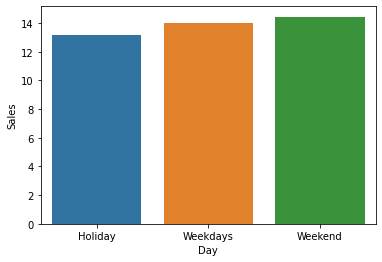

In [ ]:
import matplotlib.pyplot as plt # both imported for visualization purpose
import seaborn as sn

#bar plot
sales_by_day = ad_df.groupby('Day')['Sales'].mean().reset_index()

sn.barplot(x='Day', y='Sales', data=sales_by_day)

In [ ]:
#Insight- It can be inferred that Sales were more on weekends as compared to the holidays and weekdays

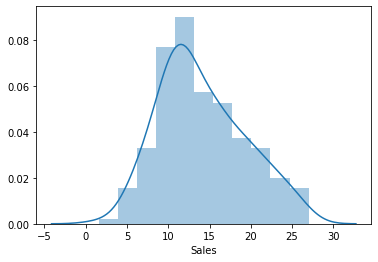

In [ ]:
#Histogram

sn.distplot( ad_df['Sales']);

In [ ]:
#This shows how sales of the company is distributed across the continuous period 

##### Q6. Split dataset

In [ ]:
import statsmodels.api as sm #import stats model for model building
from sklearn.model_selection import train_test_split #use sklearn for training and model testing

x=sm.add_constant(ad_df_encoded)
y= ad_df['Sales']

In [ ]:
train_x, test_x, train_y, test_y = train_test_split( x, y, train_size = 0.7, random_state = 60 )

##### Q7. Model Building

In [ ]:
#on training data
ad_model1=sm.OLS(train_y, train_x).fit() #model creation using ordinary least square method


In [ ]:
ad_model1.summary() #give model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                    0.4021
Date:                Wed, 26 Aug 2020   Prob (F-statistic):              0.847
Time:                        09:48:54   Log-Likelihood:                -413.53
No. Observations:                 137   AIC:                             839.1
Df Residuals:                     131   BIC:                             856.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           13.0346      5.557      2.345      0.021       2.041      24.028
TV               0.0041      0.007      0.595      0.553      -0.010       0.018
Radio            0.0270      0.032      0.857      0.393      -0.035       0.089
Newspaper       -0.0081      0.022     -0.371      0.711      -0.051       0.035
Day_Weekdays    -0.0307      5.232     -0.006      0.995     -10.382      10.320
Day_Weekend      0.4304      5.215      0.083      0.934      -9.887      10.748
==============================================================================
Omnibus:                        4.880   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.087   Jarque-Bera (JB):                4.978
Skew:                           0.450   Prob(JB):                       0.0830
Kurtosis:                       2.751   Cond. No.                     3.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#as p value is much more than 0.05(5%significance) for all features there is a high chance of multi collinearity
#Equation of Model 1
#Sales= 13.0346 + 0.0041*TV_ad +0.0270*Radio -0.0081*NEwspaper  	-0.0307*Weekday +0.4304*Weekend + 5.557

Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # to calculate vif

def get_vif_factors( X ): #function for vif calculation
  X_matrix = X.values #matrix of features (as_matrix has been deprecated and thus use values for creating matrix)
  vif = [ variance_inflation_factor( X_matrix, i ) for i in range( X_matrix.shape[1] ) ] #for all features calculate vif
  vif_factors = pd.DataFrame() #dataframe creation
  vif_factors['column'] = X.columns #column 1 is called coulmn name , means x featres
  vif_factors['vif'] = vif #column 2 is the vif values corresponding to columns
  
  return vif_factors

In [ ]:
vif_factors = get_vif_factors( x[x_features] ) #calling vif function/method
vif_factors

,column,vif
0,TV,5.972512
1,Radio,3.930583
2,Newspaper,3.499641
3,Day_Weekdays,4.513938
4,Day_Weekend,4.048673


In [ ]:
#except for radio and newspaper, all have more than 4 vif, thus check heatmap and get correlation
import matplotlib.pyplot as plt # both imported for visualization purpose
import seaborn as sn

col_large_vif= vif_factors[vif_factors.vif > 4].column #get all columns with high vif

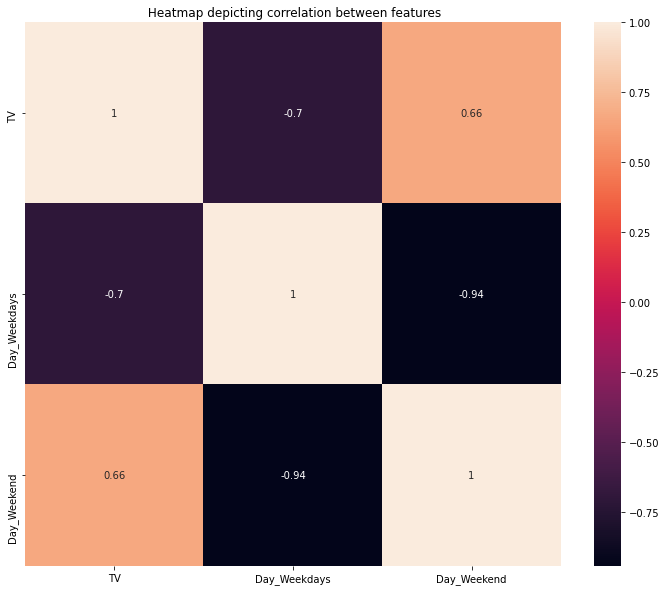

In [ ]:
plt.figure( figsize = (12,10) ) #plot size
sn.heatmap( x[col_large_vif].corr(), annot = True ); #heatmap creation among high vif features
plt.title( " Heatmap depicting correlation between features"); #graph title

In [ ]:
#we know that high correlation occurs when factor is more than 0.7thus we'll first just 
#remove day_weekend and day_weekdays and check the model

columns_to_be_removed = ['Day_Weekdays', 'Day_Weekend']

x_new_features = list( set(x_features) - set(columns_to_be_removed) )
x_new_features

['Newspaper', 'Radio', 'TV']

In [ ]:
get_vif_factors(x[x_new_features])

,column,vif
0,Newspaper,3.220280
1,Radio,3.251875
2,TV,2.553848


In [ ]:
#hence we can see that now vif< 4 thus multicollinearity has been removed


New Model building - Model 2

In [ ]:

#x=sm.add_constant(ad_df_encoded)

train_x=train_x[x_new_features]
ad_model2= sm.OLS(train_y, train_x).fit()
ad_model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.773   
Dependent Variable:     Sales            AIC:                         929.2286
Date:                   2020-08-26 09:48 BIC:                         937.9885
No. Observations:       137              Log-Likelihood:              -461.61 
Df Model:               3                F-statistic:                 156.3   
Df Residuals:           134              Prob (F-statistic):          1.43e-43
R-squared (uncentered): 0.778            Scale:                       50.560  
-----------------------------------------------------------------------------------
               Coef.       Std.Err.        t         P>|t|       [0.025      0.975]
-----------------------------------------------------------------------------------
Newspaper      0.0689        0.0291      2.3707      0.0192      0.0114      0.1263
Radio          0.1929        0.0389      4.9596      0.0000      0.1160      0.2698
TV             0.0412        0.0055      7.4738      0.0000      0.0303      0.0522
------------------------------------------------------------------------------
Omnibus:                   1.905            Durbin-Watson:               1.729
Prob(Omnibus):             0.386            Jarque-Bera (JB):            1.432
Skew:                      0.208            Prob(JB):                    0.489
Kurtosis:                  3.278            Condition No.:               12   
==============================================================================

"""

In [ ]:
#now p values are less than 0.05 and these 3 factors all have significant influence on sales
#Equation
#Sales= #13.0346# + 0.0412*TV_ad +0.1929*Radio +0.0689*NEwspaper 

#####Q7. Residual Analysis & Outlier Analysis

In [ ]:
#Check normality of error- PP-Plot
#function
def draw_pp_plot( model, title ):
  probplot = sm.ProbPlot( model.resid );
  plt.figure( figsize = (8, 6) );
  probplot.ppplot( line='45' );
  plt.title( title );
  plt.show();

<Figure size 576x432 with 0 Axes>

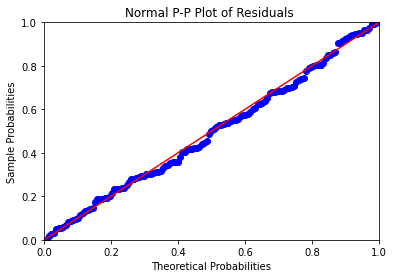

In [ ]:
draw_pp_plot( ad_model2, "Normal P-P Plot of Residuals ") # this graph shows that residuals are normal

In [ ]:
#scatter plot 
def get_standardized_values( vals ):
  return (vals - vals.mean())/vals.std()

def plot_resid_fitted( fitted, resid, title):
  plt.scatter( get_standardized_values( fitted ), get_standardized_values( resid ) )
  plt.title( title )
  plt.xlabel( "Standardized predicted values")
  plt.ylabel( "Standardized residual values")
  plt.show()



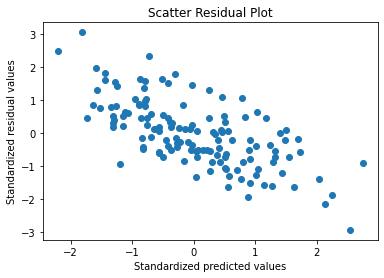

In [ ]:
plot_resid_fitted( ad_model2.fittedvalues,ad_model2.resid,"Scatter Residual Plot") 
#not funnel shaped and thus homoscadistic

Outlier Analysis

Number of variables: 3  and number of observations: 137
Cutoff for leverage value:  0.088


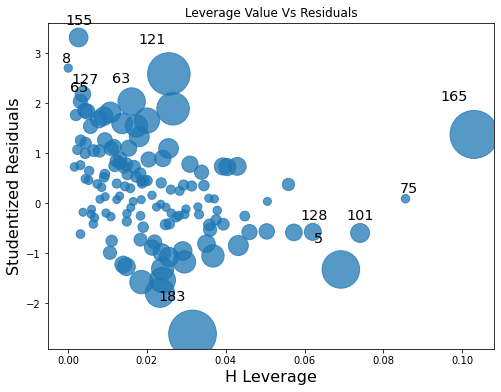

In [ ]:
#1. Zscore

k = train_x.shape[1]
n = train_x.shape[0]
print( "Number of variables:", k, " and number of observations:", n)
leverage_cutoff = 3*((k + 1)/n)
print( "Cutoff for leverage value: ", round(leverage_cutoff, 3) )

from statsmodels.graphics.regressionplots import influence_plot

fig, ax = plt.subplots( figsize=(8,6) )
influence_plot( ad_model2, ax = ax )
plt.title( "Leverage Value Vs Residuals")
plt.show()


In [ ]:
ad_df[ad_df.index.isin( [165] )] #outlier- value above 0.88 and bigger in size thus more inflence

,Sno,TV,Radio,Newspaper,Day,Sales
165,166,234.5,3.4,84.8,Weekend,25.4


In [ ]:
train_X_new = train_x.drop( [165], axis = 0)
train_y_new = train_y.drop( [165], axis = 0)

In [ ]:
train_X_new


,Newspaper,Radio,TV
84,33.8,43.0,213.5
150,37.0,13.9,280.7
135,8.5,47.0,48.3
126,50.6,38.9,7.8
159,34.6,18.4,131.7
...,...,...,...
102,21.4,10.1,280.2
146,8.7,7.3,240.1
141,75.6,35.4,193.7
73,31.3,5.7,129.4


In [ ]:
train_x

,Newspaper,Radio,TV
84,33.8,43.0,213.5
150,37.0,13.9,280.7
135,8.5,47.0,48.3
126,50.6,38.9,7.8
159,34.6,18.4,131.7
...,...,...,...
102,21.4,10.1,280.2
146,8.7,7.3,240.1
141,75.6,35.4,193.7
73,31.3,5.7,129.4


In [ ]:
ad_model3= sm.OLS(train_y_new, train_X_new).fit()
ad_model3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.771   
Dependent Variable:     Sales            AIC:                         921.5649
Date:                   2020-08-26 09:48 BIC:                         930.3029
No. Observations:       136              Log-Likelihood:              -457.78 
Df Model:               3                F-statistic:                 153.7   
Df Residuals:           133              Prob (F-statistic):          4.90e-43
R-squared (uncentered): 0.776            Scale:                       50.226  
----------------------------------------------------------------------------------
                  Coef.      Std.Err.       t        P>|t|       [0.025     0.975]
----------------------------------------------------------------------------------
Newspaper         0.0572       0.0302     1.8964     0.0601     -0.0025     0.1169
Radio             0.2067       0.0401     5.1620     0.0000      0.1275     0.2860
TV                0.0407       0.0055     7.3899     0.0000      0.0298     0.0516
------------------------------------------------------------------------------
Omnibus:                   2.206            Durbin-Watson:               1.717
Prob(Omnibus):             0.332            Jarque-Bera (JB):            1.714
Skew:                      0.236            Prob(JB):                    0.424
Kurtosis:                  3.282            Condition No.:               13   
==============================================================================

"""

In [ ]:
#transforming response variable

In [ ]:
train_y_new = np.sqrt( train_y_new )

In [ ]:
ad_model4 = sm.OLS(train_y_new, train_X_new).fit()
ad_model4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.830   
Dependent Variable:     Sales            AIC:                         506.9434
Date:                   2020-08-26 09:48 BIC:                         515.6813
No. Observations:       136              Log-Likelihood:              -250.47 
Df Model:               3                F-statistic:                 221.6   
Df Residuals:           133              Prob (F-statistic):          1.53e-51
R-squared (uncentered): 0.833            Scale:                       2.3818  
-----------------------------------------------------------------------------------
               Coef.       Std.Err.        t         P>|t|       [0.025      0.975]
-----------------------------------------------------------------------------------
Newspaper      0.0186        0.0066      2.8322      0.0053      0.0056      0.0316
Radio          0.0508        0.0087      5.8215      0.0000      0.0335      0.0680
TV             0.0105        0.0012      8.7267      0.0000      0.0081      0.0128
------------------------------------------------------------------------------
Omnibus:                  0.229             Durbin-Watson:               1.768
Prob(Omnibus):            0.892             Jarque-Bera (JB):            0.083
Skew:                     -0.057            Prob(JB):                    0.960
Kurtosis:                 3.041             Condition No.:               13   
==============================================================================

"""

<Figure size 576x432 with 0 Axes>

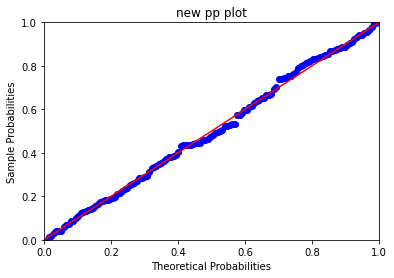

In [ ]:
#ppplot
draw_pp_plot(ad_model4, "new pp plot")

##### Q8. RMSE

In [ ]:
#predicting value on validation set
pred_y = np.power(ad_model4.predict(test_x[train_X_new.columns]),2)

#pred_y

In [ ]:
#RMSE

from sklearn import metrics
np.sqrt(metrics.mean_squared_error(pred_y, test_y))

12.166536878890795

In [ ]:
#R square value 
np.round( metrics.r2_score(pred_y, test_y), 2 ) #much less than as shown in training data-. 0.83

-0.42

In [ ]:
#Autocorrelation between error terms - since durbin watson test value = 1.7 <2 -> no auto-correlation

##### Q9. Calculation


In [ ]:
#Let's take

TV=97.5
Radio=7.6
Np=7.2
Weekday=1
Weeknd=0
#Model 1: 
Sale_daily1= 13.0346 + 0.0041*TV +0.0270*Radio -0.0081*Np -0.0307*Weekday +0.4304*Weeknd + 5.557
print("Model 1\n"+"TV=97.5, Radio=7.6,Np=7.2,Weekday=1,Weeknd=0"+" Daily sales : ", round(Sale_daily1,3))
#Model 2: 
Sale_daily2= 0.0412*TV +0.1929*Radio +0.0689*Np 
print("Model 2\n"+"TV=97.5, Radio=7.6,Np=7.2 "+" Daily sales : ", round(Sale_daily2,3) )
#Model 3: 
Sale_daily3= 0.0407*TV +0.2067*Radio +0.0572*Np 
print("Model 4\n"+"TV=97.5, Radio=7.6,Np=7.2 "+" Daily sales : ", round(Sale_daily3,3) )
#Model 4:
Sale_daily4= 0.0105*TV +0.0508*Radio +0.0186*Np 
print("Model 4\n"+"TV=97.5, Radio=7.6,Np=7.2 "+" Daily sales : ", round(Sale_daily4,3))

Model 1
TV=97.5, Radio=7.6,Np=7.2,Weekday=1,Weeknd=0 Daily sales :  19.108
Model 2
TV=97.5, Radio=7.6,Np=7.2  Daily sales :  5.979
Model 4
TV=97.5, Radio=7.6,Np=7.2  Daily sales :  5.951
Model 4
TV=97.5, Radio=7.6,Np=7.2  Daily sales :  1.544


In [ ]:
ad_df[13:14]

,Sno,TV,Radio,Newspaper,Day,Sales
13,14,97.5,7.6,7.2,Weekdays,1.6


In [1]:
resid_model4=1.6-1.544

In [3]:
pip install nbconvert
jupyter nbconvert --to html mugdhamathur-19A1HP064_aug.ipynb

SyntaxError: ignored